
# Project Aim

The goal of this project is to develop a predictive model that analyzes historical Fitbit data. 

To recommend personalized sleep, diet, and activity plans.

By individual fitness and health data.

### Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import skew

### 1. Data Collection

In [46]:
# Load the dataset
file_path = r'D:\ActivityP\Activity_data\activity_data.csv'
df = pd.read_csv(file_path)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### 2. Data Understanding 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [48]:
# Duplicates 
df.duplicated().sum()

np.int64(0)

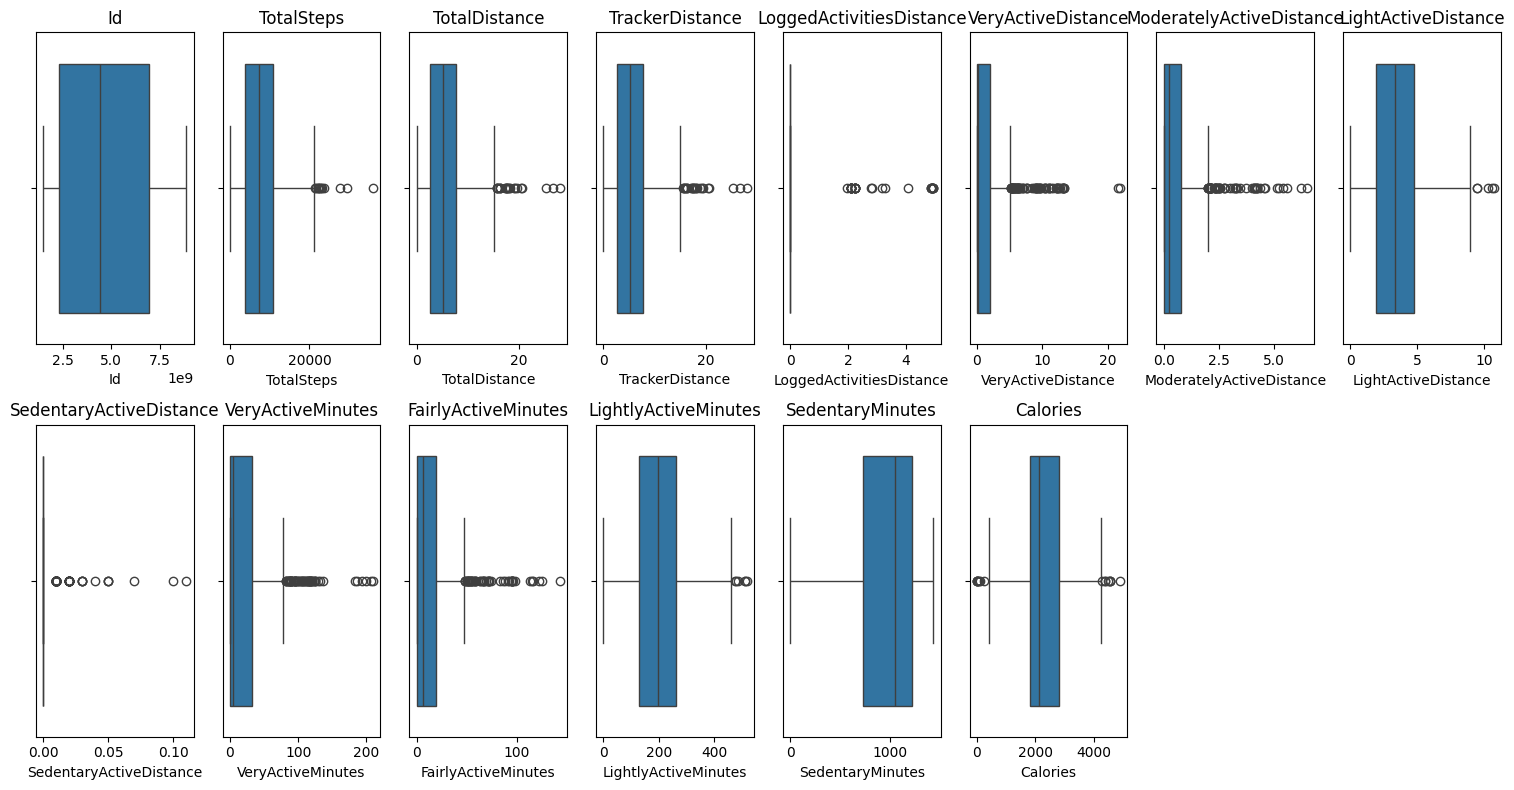

In [49]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### 3. Data Cleaning

In [50]:
# Drop the 'Id' and 'ActivityDate' columns
df.drop(['Id', 'ActivityDate'], axis=1, inplace=True)
df.drop('LoggedActivitiesDistance', axis=1, inplace=True)

In [51]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping values
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)

    df[col] = df[col].apply(lambda x: lower_cap if x < lower_bound else upper_cap if x > upper_bound else x)
    
df.describe()

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7521.295957,5.314702,5.300351,1.308978,0.502872,3.321447,0.000872,19.807713,12.226596,191.992872,991.210638,2307.461489
std,4769.322359,3.417309,3.396652,1.930162,0.648749,1.992660,0.002823,28.130305,15.330395,107.339672,301.267437,673.708127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,403.000000
25%,3789.750000,2.620000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,7.710000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,21129.000000,15.080000,15.080000,6.403000,2.130000,8.970000,0.010000,93.050000,51.000000,461.000000,1440.000000,4236.000000


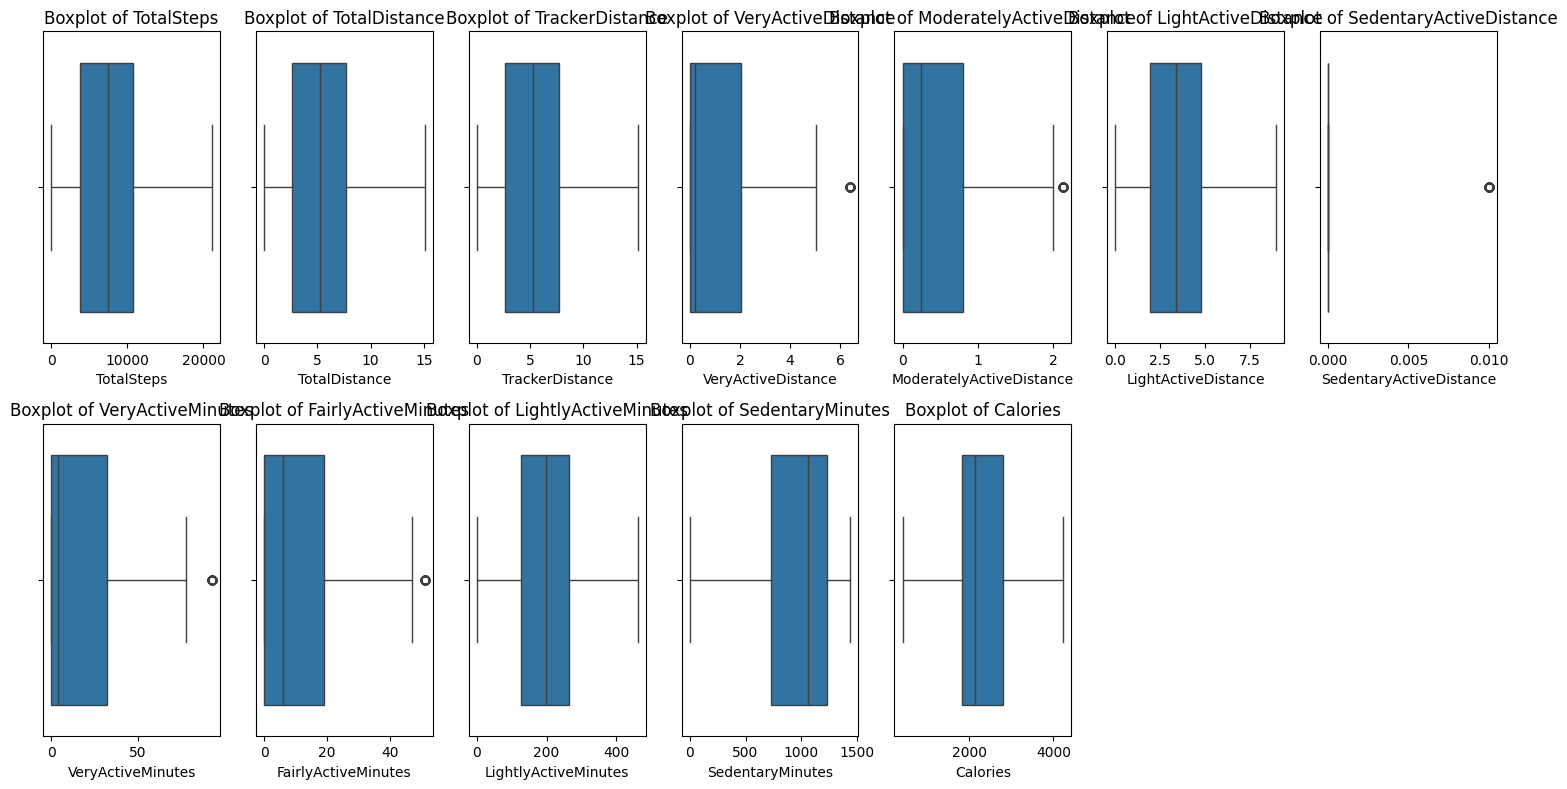

In [52]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols) // 2 + 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### 4. Exploratory Data Analysis
Measures of Central Tendency 

In [53]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

summary = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Mode': numeric_cols.mode().iloc[0]  # Take the first mode (if multiple)
})

summary

,Mean,Median,Mode
TotalSteps,7521.295957,7405.500,0.0
TotalDistance,5.314702,5.245,0.0
TrackerDistance,5.300351,5.245,0.0
VeryActiveDistance,1.308978,0.210,0.0
ModeratelyActiveDistance,0.502872,0.240,0.0
LightActiveDistance,3.321447,3.365,0.0
SedentaryActiveDistance,0.000872,0.000,0.0
VeryActiveMinutes,19.807713,4.000,0.0
FairlyActiveMinutes,12.226596,6.000,0.0
LightlyActiveMinutes,191.992872,199.000,0.0


Measures of Dispersion


In [54]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate measures of dispersion
dispersion_summary = pd.DataFrame({
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max(),
    'Range': numeric_cols.max() - numeric_cols.min(),
    'Variance': numeric_cols.var(),
    'Std Dev': numeric_cols.std(),
    'IQR': numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25)
})

dispersion_summary

,Min,Max,Range,Variance,Std Dev,IQR
TotalSteps,0.0,21129.000,21129.000,2.274644e+07,4769.322359,6937.2500
TotalDistance,0.0,15.080,15.080,1.167800e+01,3.417309,5.0925
TrackerDistance,0.0,15.080,15.080,1.153725e+01,3.396652,5.0900
VeryActiveDistance,0.0,6.403,6.403,3.725527e+00,1.930162,2.0525
ModeratelyActiveDistance,0.0,2.130,2.130,4.208750e-01,0.648749,0.8000
LightActiveDistance,0.0,8.970,8.970,3.970692e+00,1.992660,2.8375
SedentaryActiveDistance,0.0,0.010,0.010,7.970906e-06,0.002823,0.0000
VeryActiveMinutes,0.0,93.050,93.050,7.913141e+02,28.130305,32.0000
FairlyActiveMinutes,0.0,51.000,51.000,2.350210e+02,15.330395,19.0000
LightlyActiveMinutes,0.0,461.000,461.000,1.152181e+04,107.339672,137.0000


In [55]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
skewness = numeric_cols.skew()
skewness

TotalSteps                  0.226180
TotalDistance               0.232795
TrackerDistance             0.220793
VeryActiveDistance          1.547767
ModeratelyActiveDistance    1.311145
LightActiveDistance         0.032957
SedentaryActiveDistance     2.930252
VeryActiveMinutes           1.428582
FairlyActiveMinutes         1.247461
LightlyActiveMinutes       -0.136466
SedentaryMinutes           -0.294498
Calories                    0.550050
dtype: float64

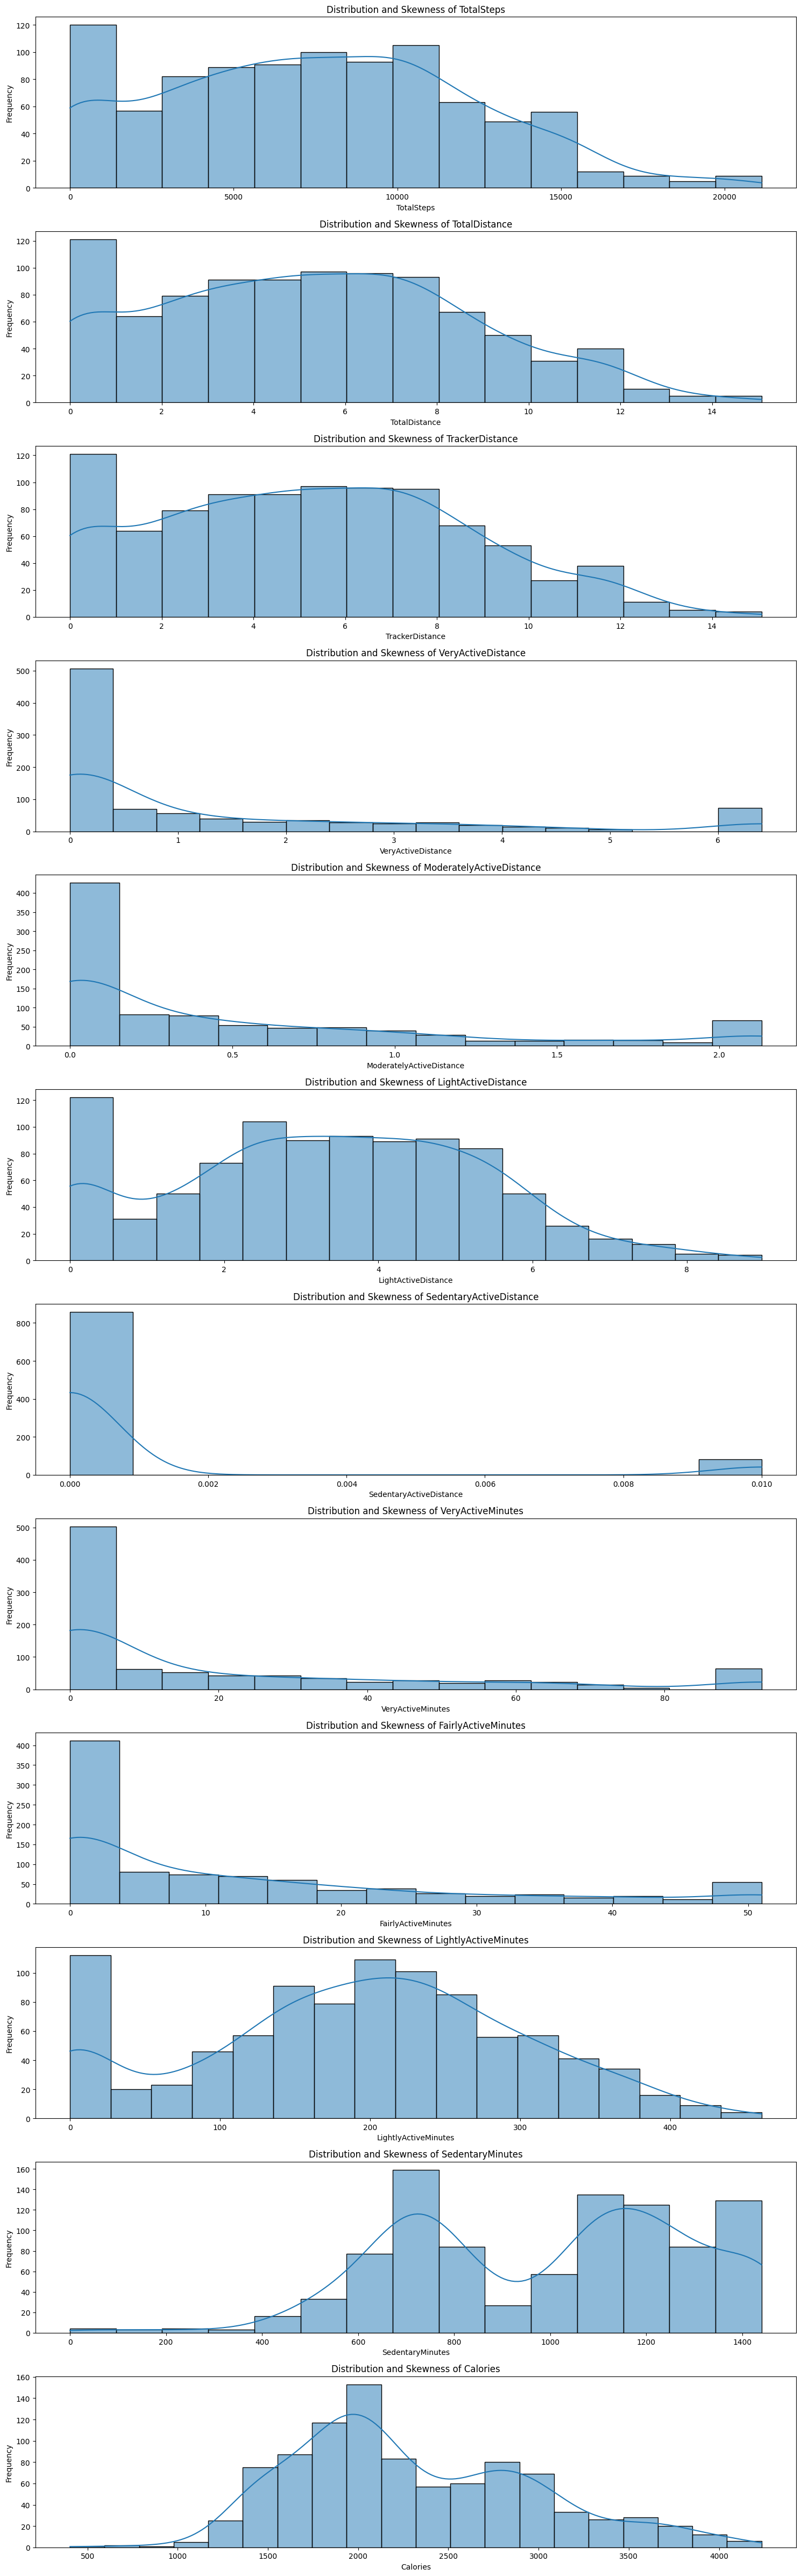

In [56]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 4 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution and Skewness of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

                          TotalSteps  TotalDistance  TrackerDistance  \
TotalSteps                  1.000000       0.986414         0.986277   
TotalDistance               0.986414       1.000000         0.999351   
TrackerDistance             0.986277       0.999351         1.000000   
VeryActiveDistance          0.711046       0.726782         0.724807   
ModeratelyActiveDistance    0.576411       0.579770         0.578784   
LightActiveDistance         0.713344       0.706016         0.706060   
SedentaryActiveDistance     0.019252       0.008533         0.006460   
VeryActiveMinutes           0.675141       0.684488         0.683741   
FairlyActiveMinutes         0.566660       0.569842         0.570242   
LightlyActiveMinutes        0.597416       0.572837         0.571751   
SedentaryMinutes           -0.348568      -0.339895        -0.341929   
Calories                    0.579684       0.637171         0.637993   

                          VeryActiveDistance  ModeratelyActiveD

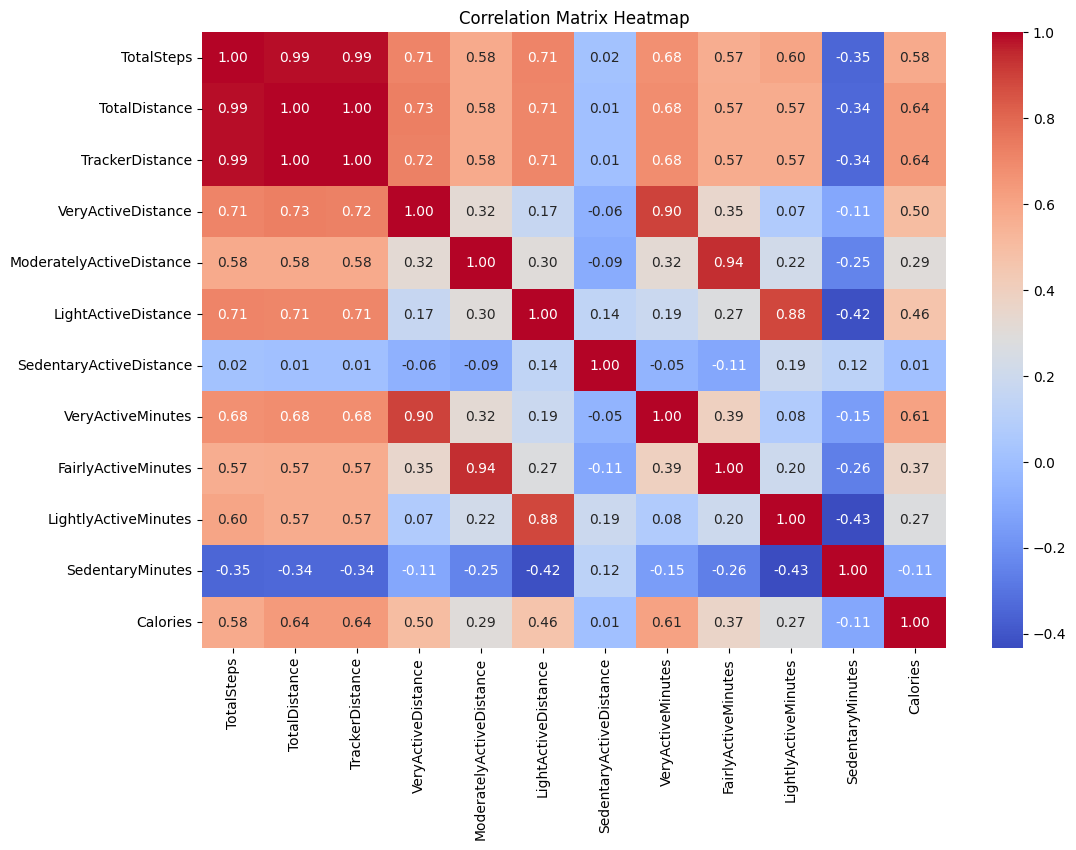

In [57]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 5. Feature Engineering 

In [62]:
df['StepsPerMinute'] = np.where(
    (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) == 0,
    0,
    df['TotalSteps'] / (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'])
)

df['DistancePerStep'] = np.where(
    df['TotalSteps'] == 0,
    0,
    df['TotalDistance'] / df['TotalSteps']
)

df['VeryActiveRatio'] = np.where(
    df['TotalDistance'] == 0,
    0,
    df['VeryActiveDistance'] / df['TotalDistance']
)

df['SedentaryRatio'] = df['SedentaryMinutes'] / 1440  # 1440 minutes in a day

In [63]:
df['ActiveMinutesTotal'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

df['ActivityScore'] = (3 * df['VeryActiveMinutes']) + (2 * df['FairlyActiveMinutes']) + df['LightlyActiveMinutes']

df['EffectiveActiveTime'] = df['ActiveMinutesTotal'] / (df['ActiveMinutesTotal'] + df['SedentaryMinutes'])


In [64]:
df['ActivityLevel'] = pd.qcut(df['TotalSteps'], q=3, labels=['Low', 'Medium', 'High'])

In [68]:
# Random gender assignment
df['Gender'] = np.random.choice(['Male', 'Female'], size=len(df))

# Random ages between 18 and 60
df['Age'] = np.random.randint(18, 61, size=len(df))

In [70]:
df = df.drop(['gender', 'age'], axis=1)

In [71]:
df

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,...,StepsPerMinute,DistancePerStep,VeryActiveRatio,SedentaryRatio,ActiveMinutesTotal,ActivityScore,EffectiveActiveTime,ActivityLevel,Gender,Age
0,13162.0,8.5000,8.5000,1.880,0.55,6.06,0.00,25.00,13.0,328.0,...,35.961749,0.000646,0.221176,0.505556,366.00,429.00,0.334552,High,Male,28
1,10735.0,6.9700,6.9700,1.570,0.69,4.71,0.00,21.00,19.0,217.0,...,41.770428,0.000649,0.225251,0.538889,257.00,318.00,0.248790,High,Female,57
2,10460.0,6.7400,6.7400,2.440,0.40,3.91,0.00,30.00,11.0,181.0,...,47.117117,0.000644,0.362018,0.845833,222.00,293.00,0.154167,High,Female,43
3,9762.0,6.2800,6.2800,2.140,1.26,2.83,0.00,29.00,34.0,209.0,...,35.889706,0.000643,0.340764,0.504167,272.00,364.00,0.272545,Medium,Male,60
4,12669.0,8.1600,8.1600,2.710,0.41,5.04,0.00,36.00,10.0,221.0,...,47.449438,0.000644,0.332108,0.536806,267.00,349.00,0.256731,High,Male,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686.0,8.1100,8.1100,1.080,0.20,6.80,0.00,17.00,4.0,245.0,...,40.172932,0.000759,0.133169,0.815278,266.00,304.00,0.184722,High,Male,52
936,20226.0,11.6565,11.6565,6.403,0.80,6.24,0.01,73.00,19.0,217.0,...,65.456311,0.000576,0.549307,0.785417,309.00,474.00,0.214583,High,Female,51
937,10733.0,8.1500,8.1500,1.350,0.46,6.28,0.00,18.00,11.0,224.0,...,42.422925,0.000759,0.165644,0.824306,253.00,300.00,0.175694,High,Male,23
938,15485.1,11.6565,11.6565,6.403,0.41,5.89,0.00,93.05,12.0,213.0,...,48.687628,0.000753,0.549307,0.782639,318.05,516.15,0.220096,High,Female,20


In [72]:
df_copy = df.copy()

In [73]:
df_copy.to_csv("df_copy.csv", index=False)

### 6. Data Transformation 

In [74]:
df

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,...,StepsPerMinute,DistancePerStep,VeryActiveRatio,SedentaryRatio,ActiveMinutesTotal,ActivityScore,EffectiveActiveTime,ActivityLevel,Gender,Age
0,13162.0,8.5000,8.5000,1.880,0.55,6.06,0.00,25.00,13.0,328.0,...,35.961749,0.000646,0.221176,0.505556,366.00,429.00,0.334552,High,Male,28
1,10735.0,6.9700,6.9700,1.570,0.69,4.71,0.00,21.00,19.0,217.0,...,41.770428,0.000649,0.225251,0.538889,257.00,318.00,0.248790,High,Female,57
2,10460.0,6.7400,6.7400,2.440,0.40,3.91,0.00,30.00,11.0,181.0,...,47.117117,0.000644,0.362018,0.845833,222.00,293.00,0.154167,High,Female,43
3,9762.0,6.2800,6.2800,2.140,1.26,2.83,0.00,29.00,34.0,209.0,...,35.889706,0.000643,0.340764,0.504167,272.00,364.00,0.272545,Medium,Male,60
4,12669.0,8.1600,8.1600,2.710,0.41,5.04,0.00,36.00,10.0,221.0,...,47.449438,0.000644,0.332108,0.536806,267.00,349.00,0.256731,High,Male,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,10686.0,8.1100,8.1100,1.080,0.20,6.80,0.00,17.00,4.0,245.0,...,40.172932,0.000759,0.133169,0.815278,266.00,304.00,0.184722,High,Male,52
936,20226.0,11.6565,11.6565,6.403,0.80,6.24,0.01,73.00,19.0,217.0,...,65.456311,0.000576,0.549307,0.785417,309.00,474.00,0.214583,High,Female,51
937,10733.0,8.1500,8.1500,1.350,0.46,6.28,0.00,18.00,11.0,224.0,...,42.422925,0.000759,0.165644,0.824306,253.00,300.00,0.175694,High,Male,23
938,15485.1,11.6565,11.6565,6.403,0.41,5.89,0.00,93.05,12.0,213.0,...,48.687628,0.000753,0.549307,0.782639,318.05,516.15,0.220096,High,Female,20


In [78]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    sk = df[col].skew()
    
    if sk > 0.5:
        # Right skewed
        df[col + '_norm'] = np.log1p(df[col])
        
    elif sk < -0.5:
        # Left skewed — reflect before log
        max_val = df[col].max()
        df[col + '_norm'] = np.log1p(max_val + 1 - df[col])

In [79]:
df.to_csv('preprocessed_data.csv', index=False)

#  ------Data Preparation Completed------